In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
M={}
M[0]=np.load('outputs/prior_conc.npy')
M[1]=np.load('outputs/cov_conc.npy')

In [3]:
titles={}
titles[0]=["Experiment 1\n\nTotal Shift $(\mathcal{P}_{X,Y})$","Concept Shift 1 $(\mathcal{P}_{X|Y})$", "Label Shift $(\mathcal{P}_{Y})$"]
titles[1]=["Experiment 2\n\nTotal Shift $(\mathcal{P}_{X,Y})$","Concept Shift 2 $(\mathcal{P}_{Y|X})$", "Covariate Shift $(\mathcal{P}_{X})$"]

In [4]:
values={}
values[0] = np.round(np.arange(-.12,.12,.01)+.005,2)
values[1] = np.arange(-.24,.24,.02) +.01

In [5]:
axislab={}
axislab[0]=["$\delta$","$\gamma$"]
axislab[1]=["$\lambda$","$\Theta$"]

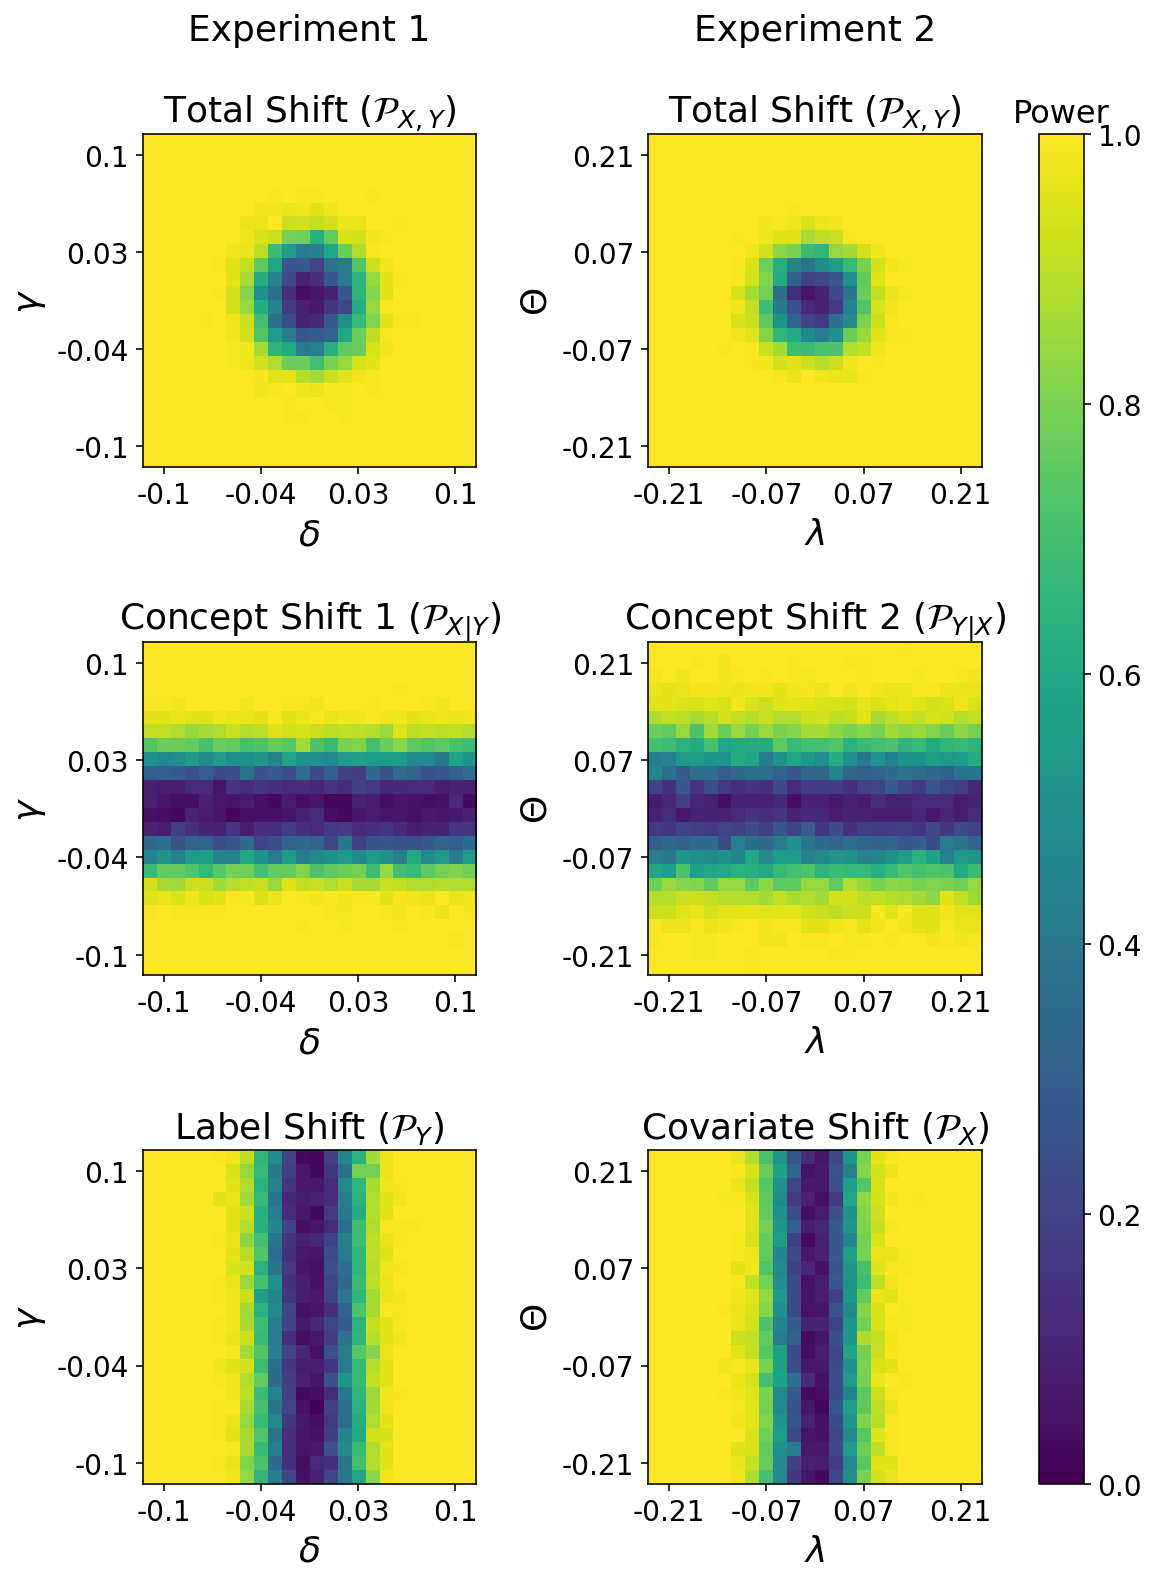

In [6]:
fig, axs = plt.subplots(3,2)
fig.tight_layout()

for i in range(3):
    for j in range(2):
        %config InlineBackend.figure_format = 'retina'
        im=axs[i,j].imshow(M[j][i], cmap='viridis', vmin=0, vmax=1)
        axs[i,j].set_title(titles[j][i], size=18)
        axs[i,j].set_xlabel(axislab[j][0], size=18)
        axs[i,j].set_ylabel(axislab[j][1], size=18)

        ticks=[1,8,15,22]
        labels=np.round(np.array(values[j]), 3)[ticks]
        axs[i,j].set_xticks(ticks)
        axs[i,j].set_xticklabels(labels, size=14)
        axs[i,j].set_yticks(ticks)
        axs[i,j].set_yticklabels(labels[::-1], size=14)
 
cbar = fig.colorbar(im, ax=axs.ravel().tolist(),aspect=30)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_title('Power',size=16)

fig.set_figheight(11)
fig.set_figwidth(9)
plt.savefig('plots/power.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()